In [7]:
!pip install seaborn
!pip install geopandas
!pip install PyKrige

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# This dataset contains "Karenia brevis" data from Texas, Mississippi, Alabama, and Florida, 
# as well as data along the Florida Shelf in the Gulf of Mexico and 
# along the eastern coast of Florida in the North Atlantic Ocean.
# Karenia brevis is a harmful algae species

alge_growth = pd.read_csv('habsos_20220225.csv')
        
alge_growth.head(100)

<ipython-input-3-77f732092627>:6: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  alge_growth = pd.read_csv('habsos_20220225.csv')


,STATE_ID,DESCRIPTION,LATITUDE,LONGITUDE,SAMPLE_DATE,SAMPLE_DEPTH,GENUS,SPECIES,CATEGORY,CELLCOUNT,...,WATER_TEMP,WATER_TEMP_UNIT,WATER_TEMP_QA,WIND_DIR,WIND_DIR_UNIT,WIND_DIR_QA,WIND_SPEED,WIND_SPEED_UNIT,WIND_SPEED_QA,OBJECTID
0,AL,Orange Beach Waterfront,30.29480,-87.57510,11-JAN-22 05.23.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,12.1,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,939786
1,AL,Bear Point,30.30880,-87.52680,11-JAN-22 05.07.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,13.9,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,939785
2,AL,Alabama Point,30.27694,-87.54167,10-JAN-22 05.43.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,16.6,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,939778
3,AL,Florida Point A,30.26620,-87.55010,10-JAN-22 05.24.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,14.9,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,939775
4,AL,Cotton Bayou,30.26940,-87.58200,10-JAN-22 05.07.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,16.1,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,939780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,AL,Alabama Point,30.27694,-87.54167,01-SEP-21 04.38.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,29.8,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,679555
96,AL,Florida Point A,30.26620,-87.55010,01-SEP-21 04.24.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,28.5,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,679556
97,AL,Cotton Bayou,30.26940,-87.58200,01-SEP-21 03.58.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,29.6,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,679557
98,AL,Gulf State Park Pavilion,30.25472,-87.64333,01-SEP-21 03.35.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,29.3,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,679559


Data sources:

https://www.ncei.noaa.gov/maps/habsos/maps.htm


In [ ]:
# original data size
print(alge_growth.shape)

(190339, 25)


In [41]:
#cleaning data

alge_growth_clean = alge_growth.drop(columns=['WIND_DIR', 'WIND_DIR_UNIT', 'WIND_DIR_QA', 'WIND_SPEED', 'WIND_SPEED_UNIT', 'WIND_SPEED_QA'])

# obtaining relavent information from database
alge_growth_clean = alge_growth_clean[alge_growth_clean['CELLCOUNT'] >= 10000] 

# convert SAMPLE_DATE to data and time format 
alge_growth_clean['SAMPLE_DATE'] = pd.to_datetime(alge_growth_clean['SAMPLE_DATE'], format='%d-%b-%y %I.%M.%S.%f000000 %p')
alge_growth_clean = alge_growth_clean[alge_growth_clean['SAMPLE_DATE'] >= '1953-01-01']
alge_growth_clean = alge_growth_clean[alge_growth_clean['SAMPLE_DATE'] <= '2022-12-31']

# q = alge_growth_clean['SAMPLE_DATE'].quantile(0.95)
# alge_growth_clean = alge_growth_clean[alge_growth_clean['SAMPLE_DATE'] <= q]


print(alge_growth_clean.info())
print(alge_growth_clean.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24025 entries, 72 to 190338
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATE_ID         24025 non-null  object        
 1   DESCRIPTION      24022 non-null  object        
 2   LATITUDE         24025 non-null  float64       
 3   LONGITUDE        24025 non-null  float64       
 4   SAMPLE_DATE      24025 non-null  datetime64[ns]
 5   SAMPLE_DEPTH     22880 non-null  float64       
 6   GENUS            24025 non-null  object        
 7   SPECIES          24025 non-null  object        
 8   CATEGORY         23821 non-null  object        
 9   CELLCOUNT        24025 non-null  int64         
 10  CELLCOUNT_UNIT   24025 non-null  object        
 11  CELLCOUNT_QA     24025 non-null  int64         
 12  SALINITY         9962 non-null   float64       
 13  SALINITY_UNIT    9962 non-null   object        
 14  SALINITY_QA      24025 non-null  int

The data I had gathered was extensive but had some columns that I did not need. I removed columns that I did not need (dropping them). I also had to convert the SAMPLE_DATE column to date and time format. Once this was done it became very apparent there was data that didnt make anysense. I then removed all data that was marked as before 1953 and anything after that was marked 2022. Once this was done it was easy to work with and understand.



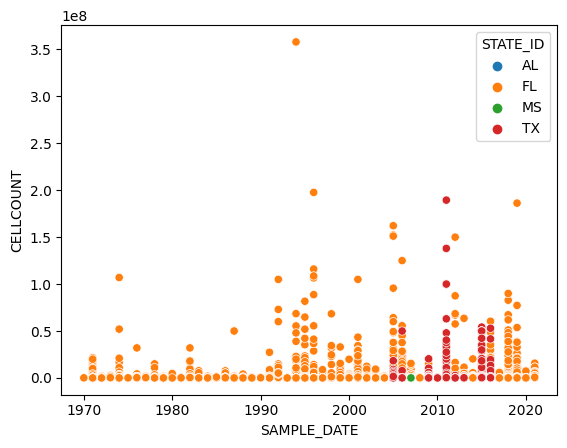

In [4]:
# Cell count VS state ID
year = alge_growth_clean['SAMPLE_DATE'].dt.year
sns.scatterplot(data=alge_growth_clean, x=year , y='CELLCOUNT', hue='STATE_ID')
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


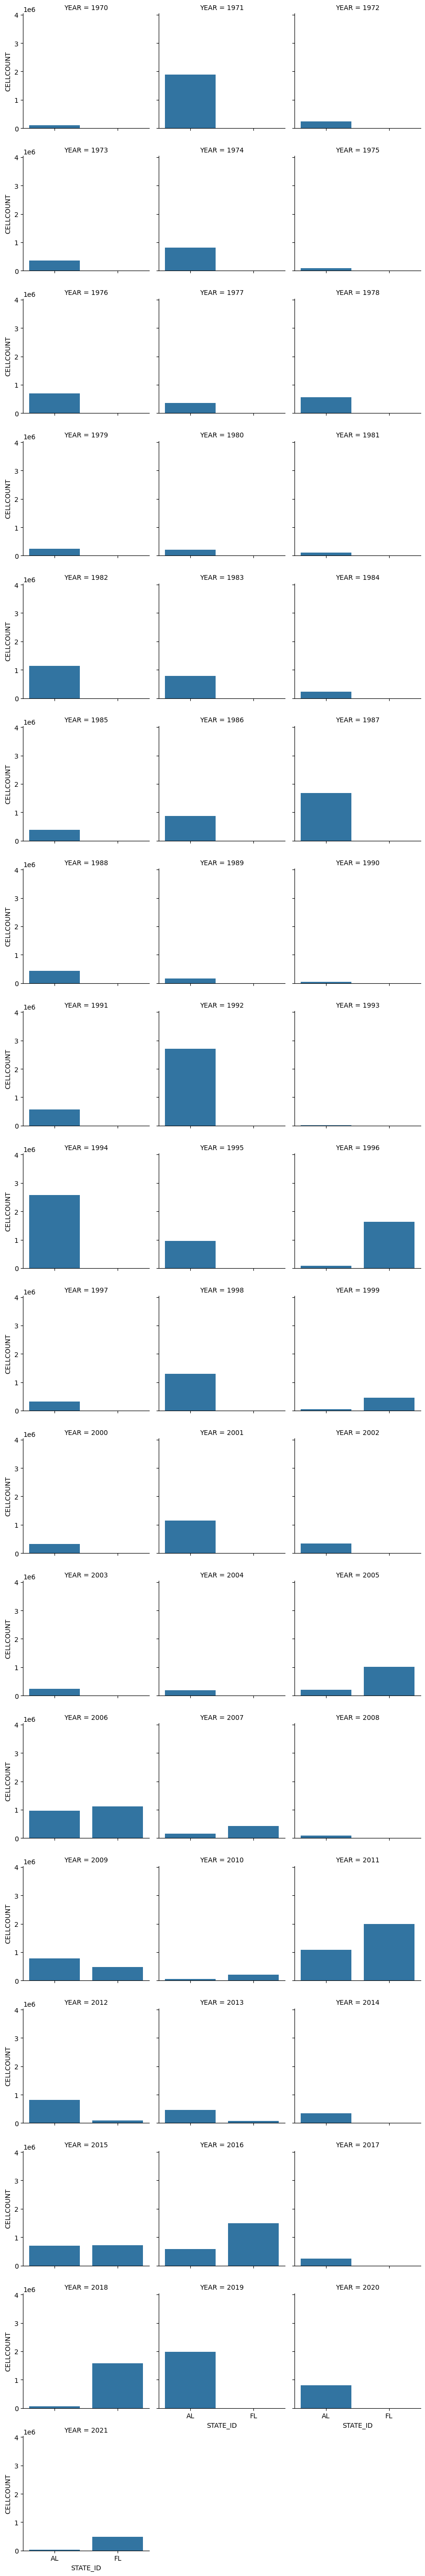

In [5]:
alge_growth_clean_y = alge_growth_clean
alge_growth_clean_y['YEAR'] = alge_growth_clean['SAMPLE_DATE'].dt.year

# group the data by year and calculate the mean of CELLCOUNT
grouped_data = alge_growth_clean_y.groupby(['YEAR', 'STATE_ID'], as_index=False)['CELLCOUNT'].mean()

# create a facet grid plot by year and state
g1 = sns.FacetGrid(grouped_data, col='YEAR', col_wrap=3)
g1.map(sns.barplot, 'STATE_ID', 'CELLCOUNT')

Text(0.5, 1.0, 'Average Cell Count by Year and State')

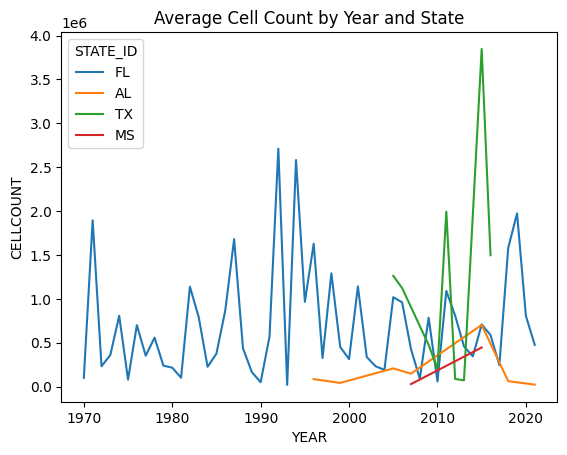

In [ ]:
g2 = sns.lineplot(data=grouped_data, x='YEAR', y='CELLCOUNT', hue='STATE_ID')
g2.set_title('Average Cell Count by Year and State')

This graph shows the cell count of Karenia brevis algae over a time frame(1970 - 2021). As you we can observe in the yea 1995 we see a large spike of cell count in Fl. This trend seems to slowly decrease but not by much. We also note the introduction of this algae in AL and TX. TX with an unusualy spike in algae observation. Some conclusion we have come to is that during the 1990's we see a trend in increase of fishing and an increase in cell count. We also observed coral reefs beging to "bleach".

    Classification:
    a. Decision Trees: Pros - easy to interpret, can handle non-linear relationships between features, can handle categorical and numerical features; Cons - can overfit to the training data, can be sensitive to small changes in the data.
    b. Random Forest: Pros - can handle complex relationships between features, can handle high-dimensional data, can reduce overfitting by averaging multiple decision trees; Cons - can be slow to train on large datasets, can be difficult to interpret compared to decision trees.
    c. Support Vector Machines (SVM): Pros - can handle non-linear relationships between features, can handle high-dimensional data, can work well with small datasets; Cons - can be slow to train on large datasets, can be sensitive to the choice of kernel function, may require tuning of hyperparameters.

    Regression:
    a. Linear Regression: Pros - simple and easy to interpret, can handle both numerical and categorical features, can work well with small datasets; Cons - assumes linear relationship between features and target, may not capture non-linear relationships or interactions between features.
    b. Random Forest Regression: Pros - can handle complex relationships between features, can handle high-dimensional data, can reduce overfitting by averaging multiple decision trees; Cons - can be slow to train on large datasets, can be difficult to interpret compared to linear regression.
    c. Gradient Boosting Regression: Pros - can handle non-linear relationships between features, can handle high-dimensional data, can work well with small datasets, can be more interpretable than random forest; Cons - can be sensitive to the choice of hyperparameters, may require more training time than linear regression.

    Clustering:
    a. K-Means: Pros - simple and easy to implement, can handle large datasets, can identify distinct clusters based on distance between observations; Cons - can be sensitive to the choice of initial cluster centers, may not perform well with non-spherical or overlapping clusters.
    b. Hierarchical Clustering: Pros - can handle non-spherical or overlapping clusters, can provide a dendrogram to visualize the cluster hierarchy; Cons - can be slow to compute on large datasets, can be sensitive to the choice of distance metric and linkage function.
    c. DBSCAN: Pros - can handle non-spherical or overlapping clusters, can automatically identify the number of clusters based on density; Cons - can be sensitive to the choice of distance metric and density threshold, may not perform well with high-dimensional data.

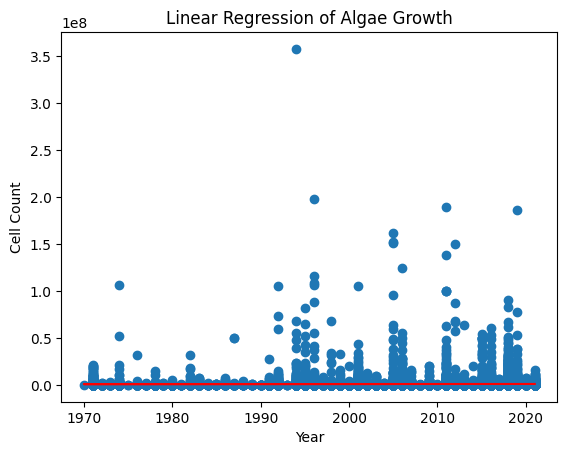

In [6]:
from sklearn.linear_model import LinearRegression

# Select the independent and dependent variables
X = alge_growth_clean[['YEAR']]
y = alge_growth_clean['CELLCOUNT']

# Create a linear regression object and fit the model
model = LinearRegression().fit(X, y)

# Make predictions on test data
y_pred = model.predict(X)

# Plot 
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Year')
plt.ylabel('Cell Count')
plt.title('Linear Regression of Algae Growth')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


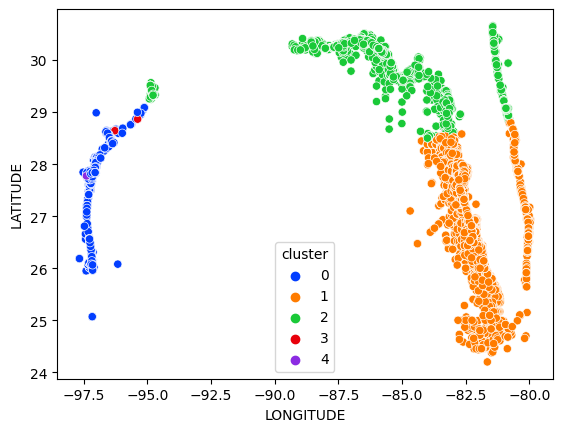

In [26]:
from sklearn.cluster import KMeans

# select features for clustering
X = alge_growth_clean[['LATITUDE', 'LONGITUDE', 'CELLCOUNT']]

# scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# set the number of clusters
n_clusters = 5

# KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# fit the data to KMeans
kmeans.fit(X_scaled)

# add cluster labels to the dataset
alge_growth_clean['cluster'] = kmeans.labels_

# plot 
sns.scatterplot(data=alge_growth_clean, x='LONGITUDE', y='LATITUDE', hue='cluster', palette='bright')
plt.show()

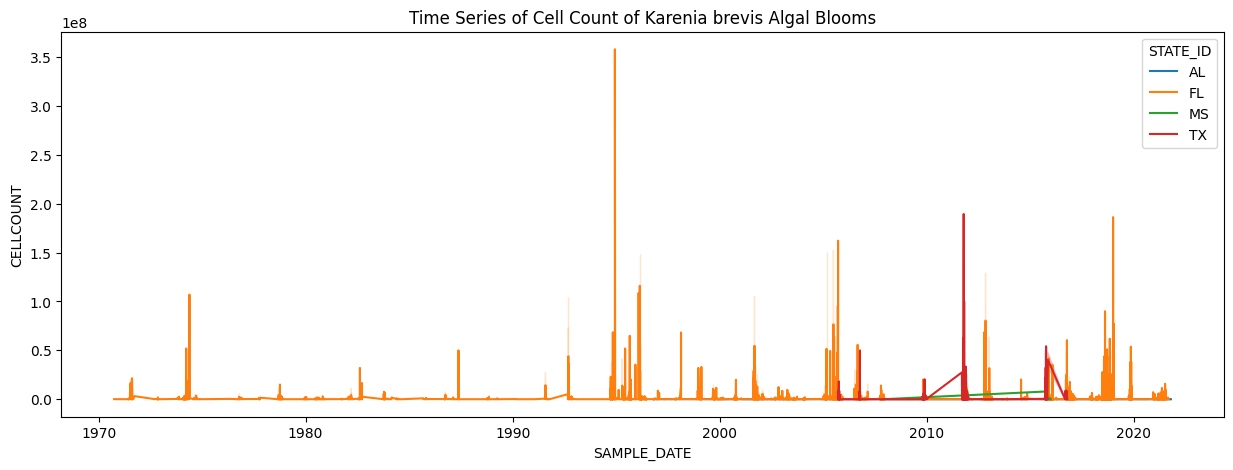

In [16]:
# Plotting the time series of cell count of Karenia brevis algal blooms
# fig, ax = plt.subplots(figsize=(15,5))
# sns.lineplot(data=alge_growth_clean, x='SAMPLE_DATE', y='CELLCOUNT', ax=ax)
# ax.set(title='Time Series of Cell Count of Karenia brevis Algal Blooms')
# plt.show()

fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=alge_growth_clean, x='SAMPLE_DATE', y='CELLCOUNT',hue='STATE_ID', ax=ax)
ax.set(title='Time Series of Cell Count of Karenia brevis Algal Blooms')
plt.show()

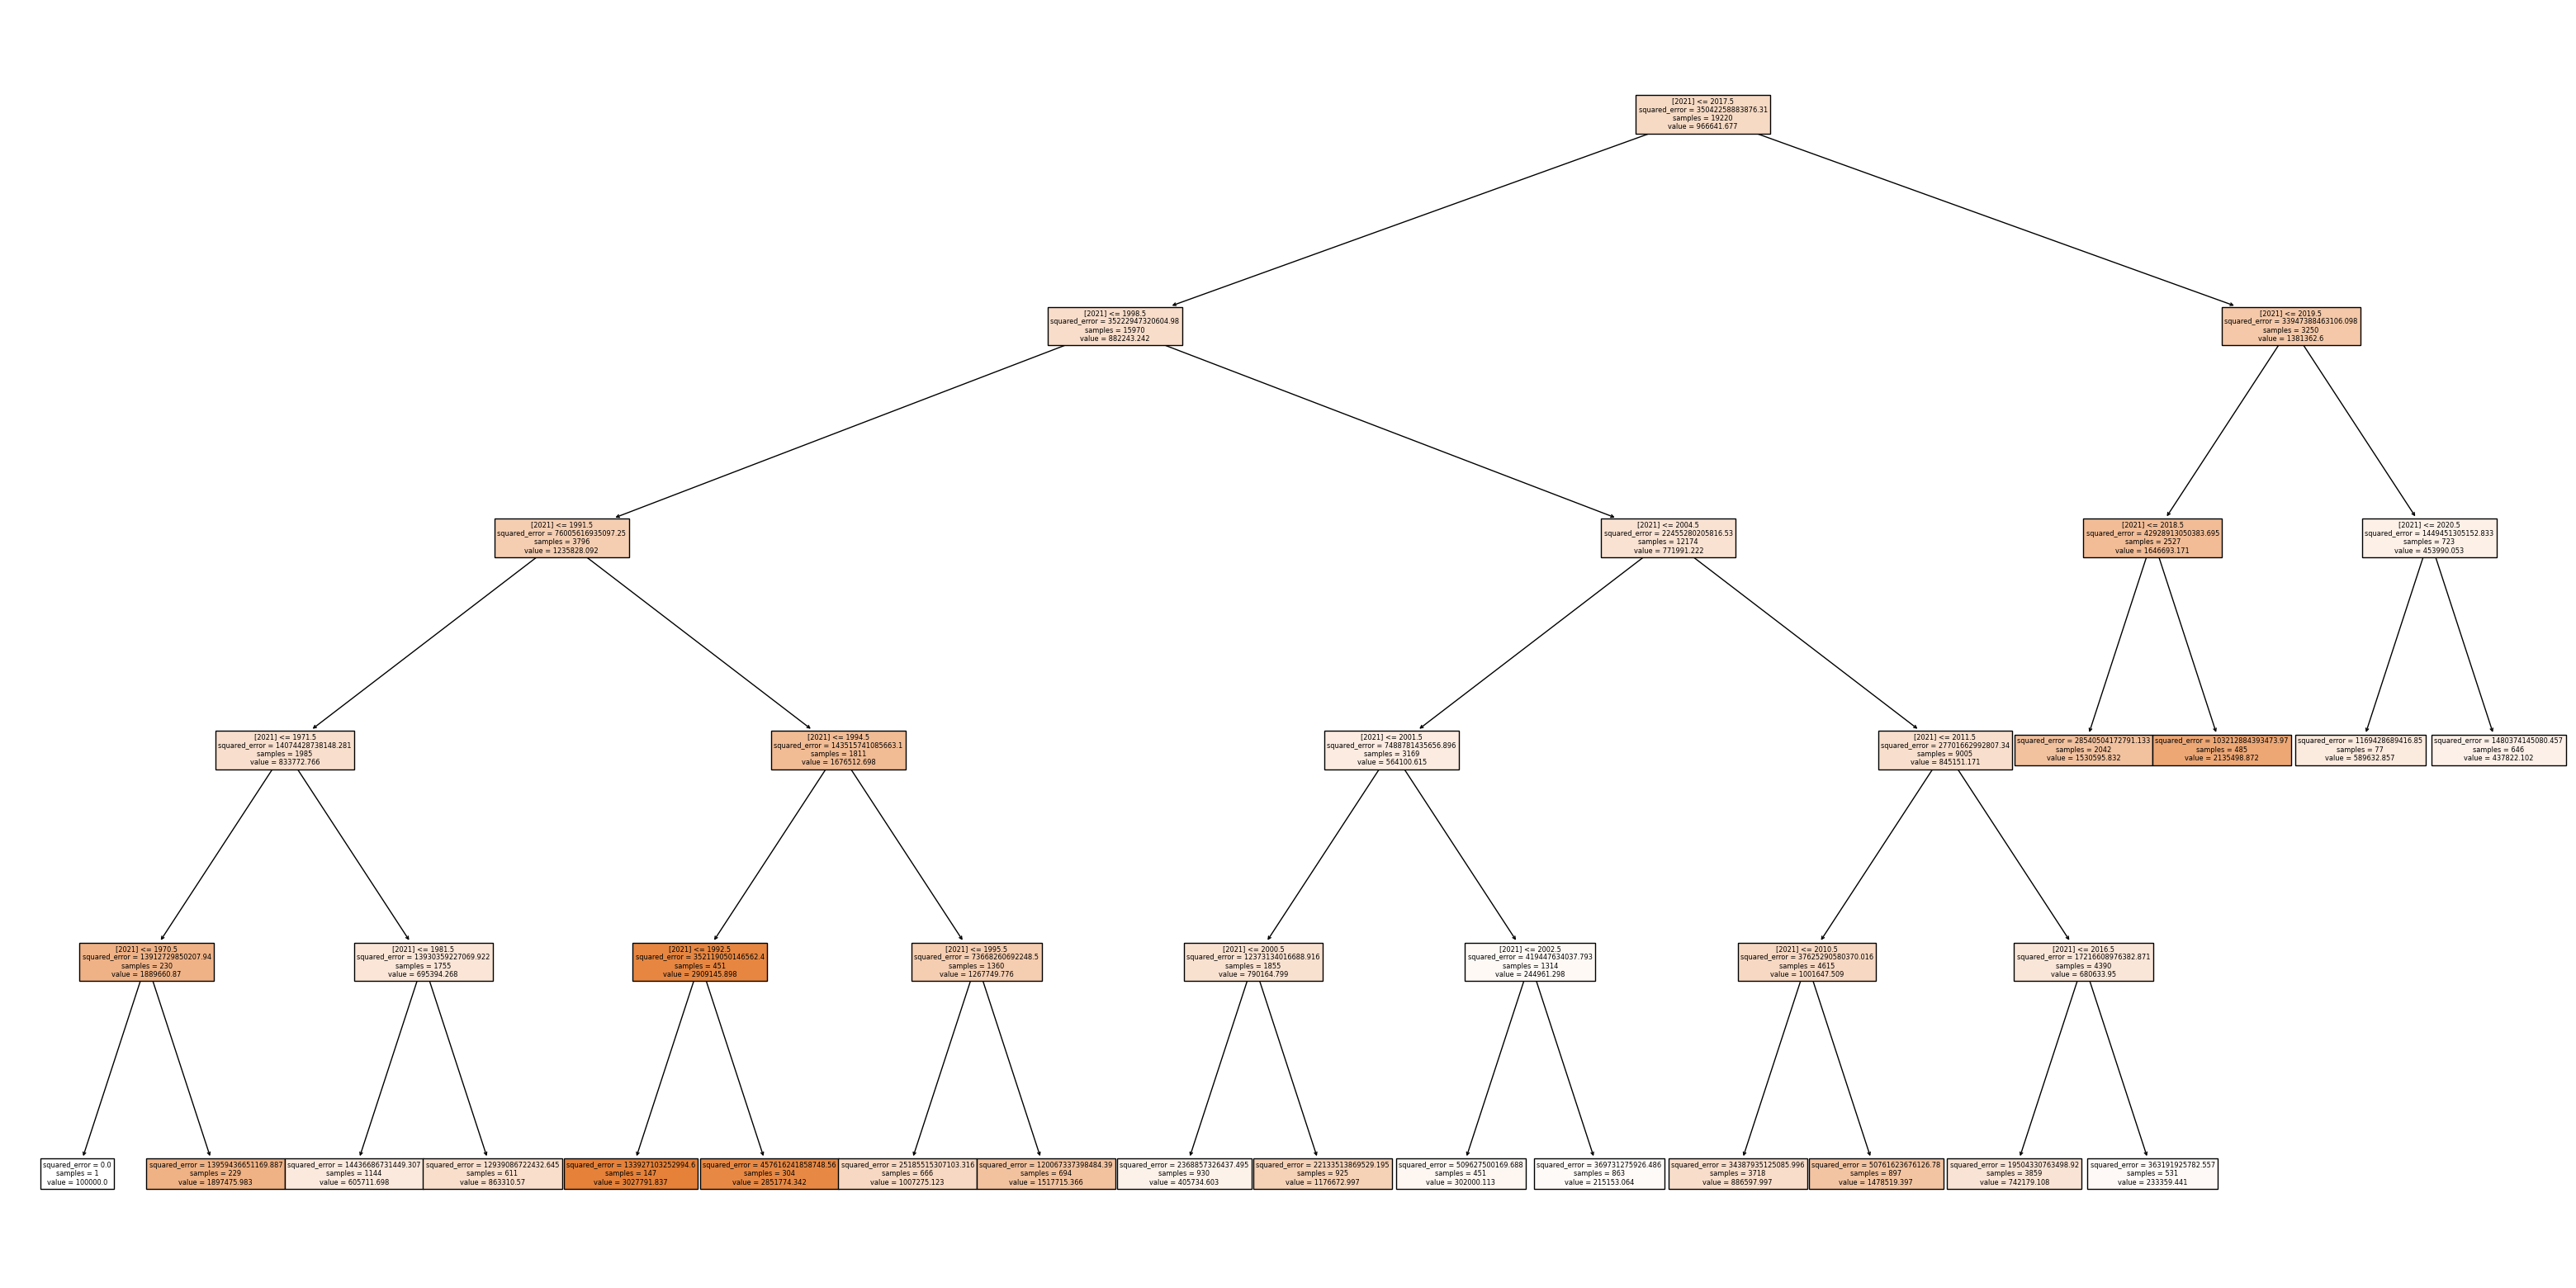

Root mean squared error: 5173153.43


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X = alge_growth_clean['SAMPLE_DATE'].dt.year.values.reshape(-1, 1)
y = alge_growth_clean['CELLCOUNT'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit decision tree regressor to training set
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_regressor.fit(X_train, y_train)

# Evaluate on testing set
y_pred = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

#Plot
plt.figure(figsize=(40,20))
plot_tree(dt_regressor, filled=True, feature_names=X)

plt.show()

print("Root mean squared error: {:.2f}".format(rmse))

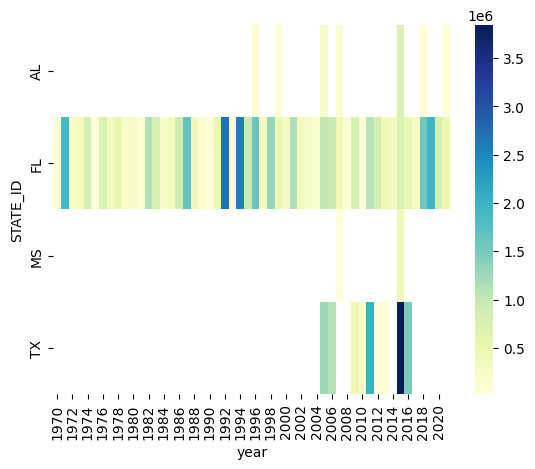

In [8]:
# Group by year and state, and calculate mean cell count for each group
alge_growth_clean['year'] = alge_growth_clean['SAMPLE_DATE'].dt.year
alge_growth_means = alge_growth_clean.groupby(['year', 'STATE_ID'], as_index=False)['CELLCOUNT'].mean()

# Pivot table to get data in correct format for heatmap
heatmap_data = alge_growth_means.pivot(index='STATE_ID', columns='year', values='CELLCOUNT')

# Create heatmap
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


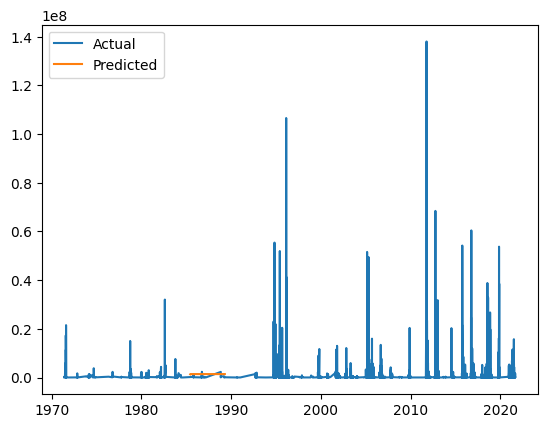

In [77]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

alge_growth_clean = alge_growth_clean.dropna()
alge_growth_clean = alge_growth_clean.groupby(['SAMPLE_DATE']).mean()
alge_growth_clean = alge_growth_clean[['CELLCOUNT']]  # Select only the 'CELLCOUNT' column

# Split data into train and test sets
train_size = int(len(alge_growth_clean) * 0.8)
train, test = alge_growth_clean[:train_size], alge_growth_clean[train_size:]

# print("This is a test", train['CELLCOUNT'])

# train.dropna()
# test.dropna()
# test = test[~test.isnull()]

# print(test)

# Train ARIMA model
# model = ARIMA(train['CELLCOUNT'], order=(1,1,1))
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(alge_growth_clean)-1, dynamic=False)
# predictions.dropna()
# predictions = predictions[~predictions.isnull()]

# print("this is type", type(predictions))

# Calculate error
error = mean_squared_error(test, predictions)

# Plot predictions
plt.plot(alge_growth_clean.index, alge_growth_clean.values, label='Actual')
plt.plot(predictions.index, predictions.values, label='Predicted')
plt.legend()
plt.show()